# Wine Project Report

###### Group members:
Ying LI 1155151488\
Ting Yuan LIN 1155148842\
Luofeng FENG 1155151520\
Anson Au-Yeung 1155148839

We use a wine data set to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

Target: Using chemical analysis determine the origin of wines.

Link to data source and data details: http://archive.ics.uci.edu/ml/datasets/Wine

In [1]:
import csv
import os
import numpy as np
np.set_printoptions(suppress=True)
import random
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import seaborn as sns

The following codes make output result in more standard format and do not affect numerical result.

In [2]:
np.set_printoptions(suppress=True) # always print floating point numbers using fixed point notation
plt.rcParams['savefig.dpi'] = 50 # (DPI/Image resolution)
plt.rcParams['figure.dpi'] = 50 #

Since the last column *Customer_Segment* is labeled (**qualitative**) data while all other columns are unlabeled (**quantitative**) data, which are not suitable for aggregated analysis or modelling since some machine learning algorithm like *k-means* only support unlabeled data. So we first try to use pandas to read the original csv file, and save only the relevant columns to a new csv file

In [3]:
fname_in = 'Wine.csv'
fname_out = 'Wine_del.csv'

f_in = pd.read_csv(fname_in)
f_in.iloc[:, :13].to_csv(fname_out)

We first read in the raw data for analysis by using command `pd.read_csv()`

In [4]:
wine = pd.read_csv(fname_out, index_col=0)

## 1.Introduction to data 

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The data set has around 13 variables as the following shows.We find the data are all numbers containing integers and floats.

In [9]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

After describing the data,we get the mean, standard deviation, min, max and quartile of 13 variables. From the mean and median (50%) of data, we can learn the central position of data. From the standard deviation and range, we can learn the degree of divergence.

In [10]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
wine_a = np.array(wine)
wine_mean = np.mean(wine_a,axis=0)
wine_median = np.median(wine_a,axis=0)
wine_ptp = wine_mean - wine_median # PTP

print('The range of each attribute is:',wine_ptp)

The range of each attribute is: [-0.04938202  0.47134831  0.00651685 -0.00505618  1.74157303 -0.05988764
 -0.10573034  0.02185393  0.03589888  0.36808988 -0.00755056 -0.16831461
 73.39325843]


We generate the correlation values and draw the correlation plot (Figure 1). Flavanoids and totalphenols, flavanoids and OD280, total phenols and OD280 have relatively high correlation (their correlation calues>=0.7). Then, we draw the pair plot (Figure 2) which shows the graphical relationship among each pair of features visually. And we draw another pair plot (Figure 3) to check the pair relationship under three customer segments.

In [12]:
# Generate correlation values
CorMatrix = wine.corr()
CorMatrix

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100



Figure 1:Correlation Plot


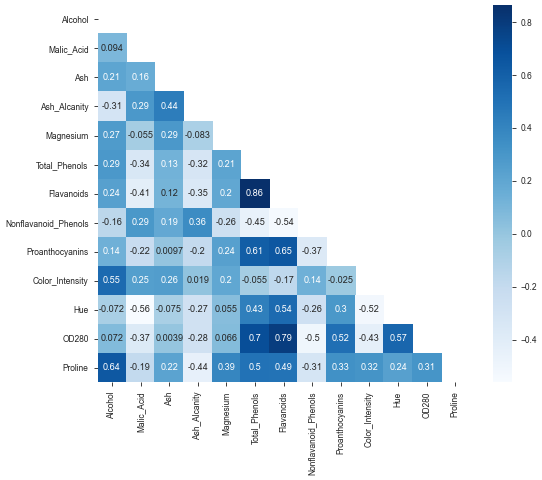

In [179]:
# Flavanoids and Total_Phenols, Flavanoids and OD280, Total_Phenols and OD280 have relatively high correlation(>=0.7)
plt.figure(figsize =(12,10))
mask = np.zeros_like(CorMatrix,dtype=np.bool) 
mask[np.triu_indices_from(mask)]=True
sns.set(font_scale=1.1,
        style="ticks",
        color_codes=True)
sns.heatmap(CorMatrix,
            mask = mask,
            annot = True,
            cmap = 'Blues')
print('\nFigure 1:Correlation Plot')


Figure 2:Pair Plot


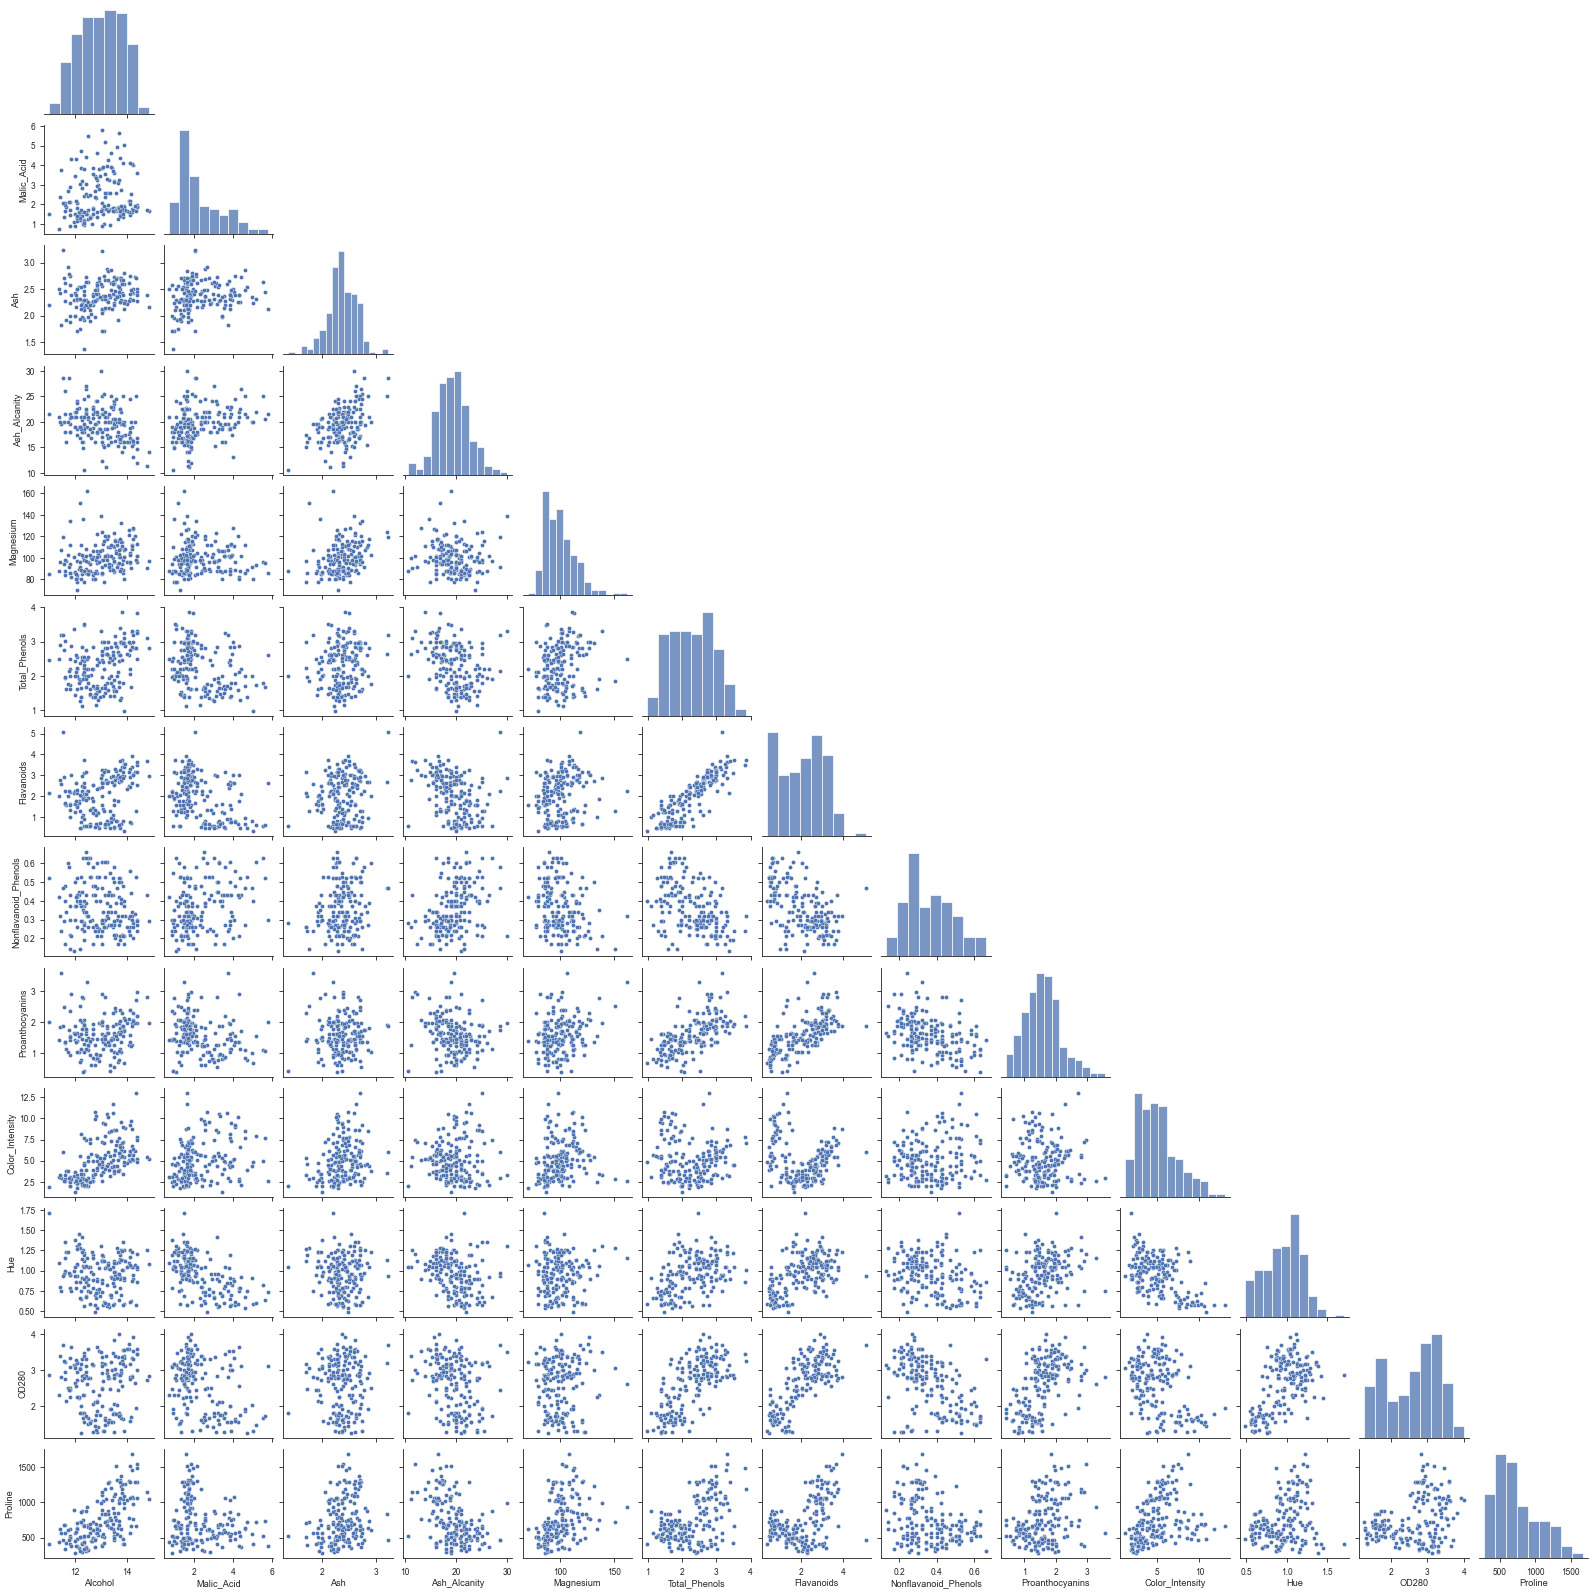

In [180]:
# Show the graphical relationship among each pair of features
sns.pairplot(wine,corner=True)
print('\nFigure 2:Pair Plot')


Figure 3:Pair Plot classify by customer segement


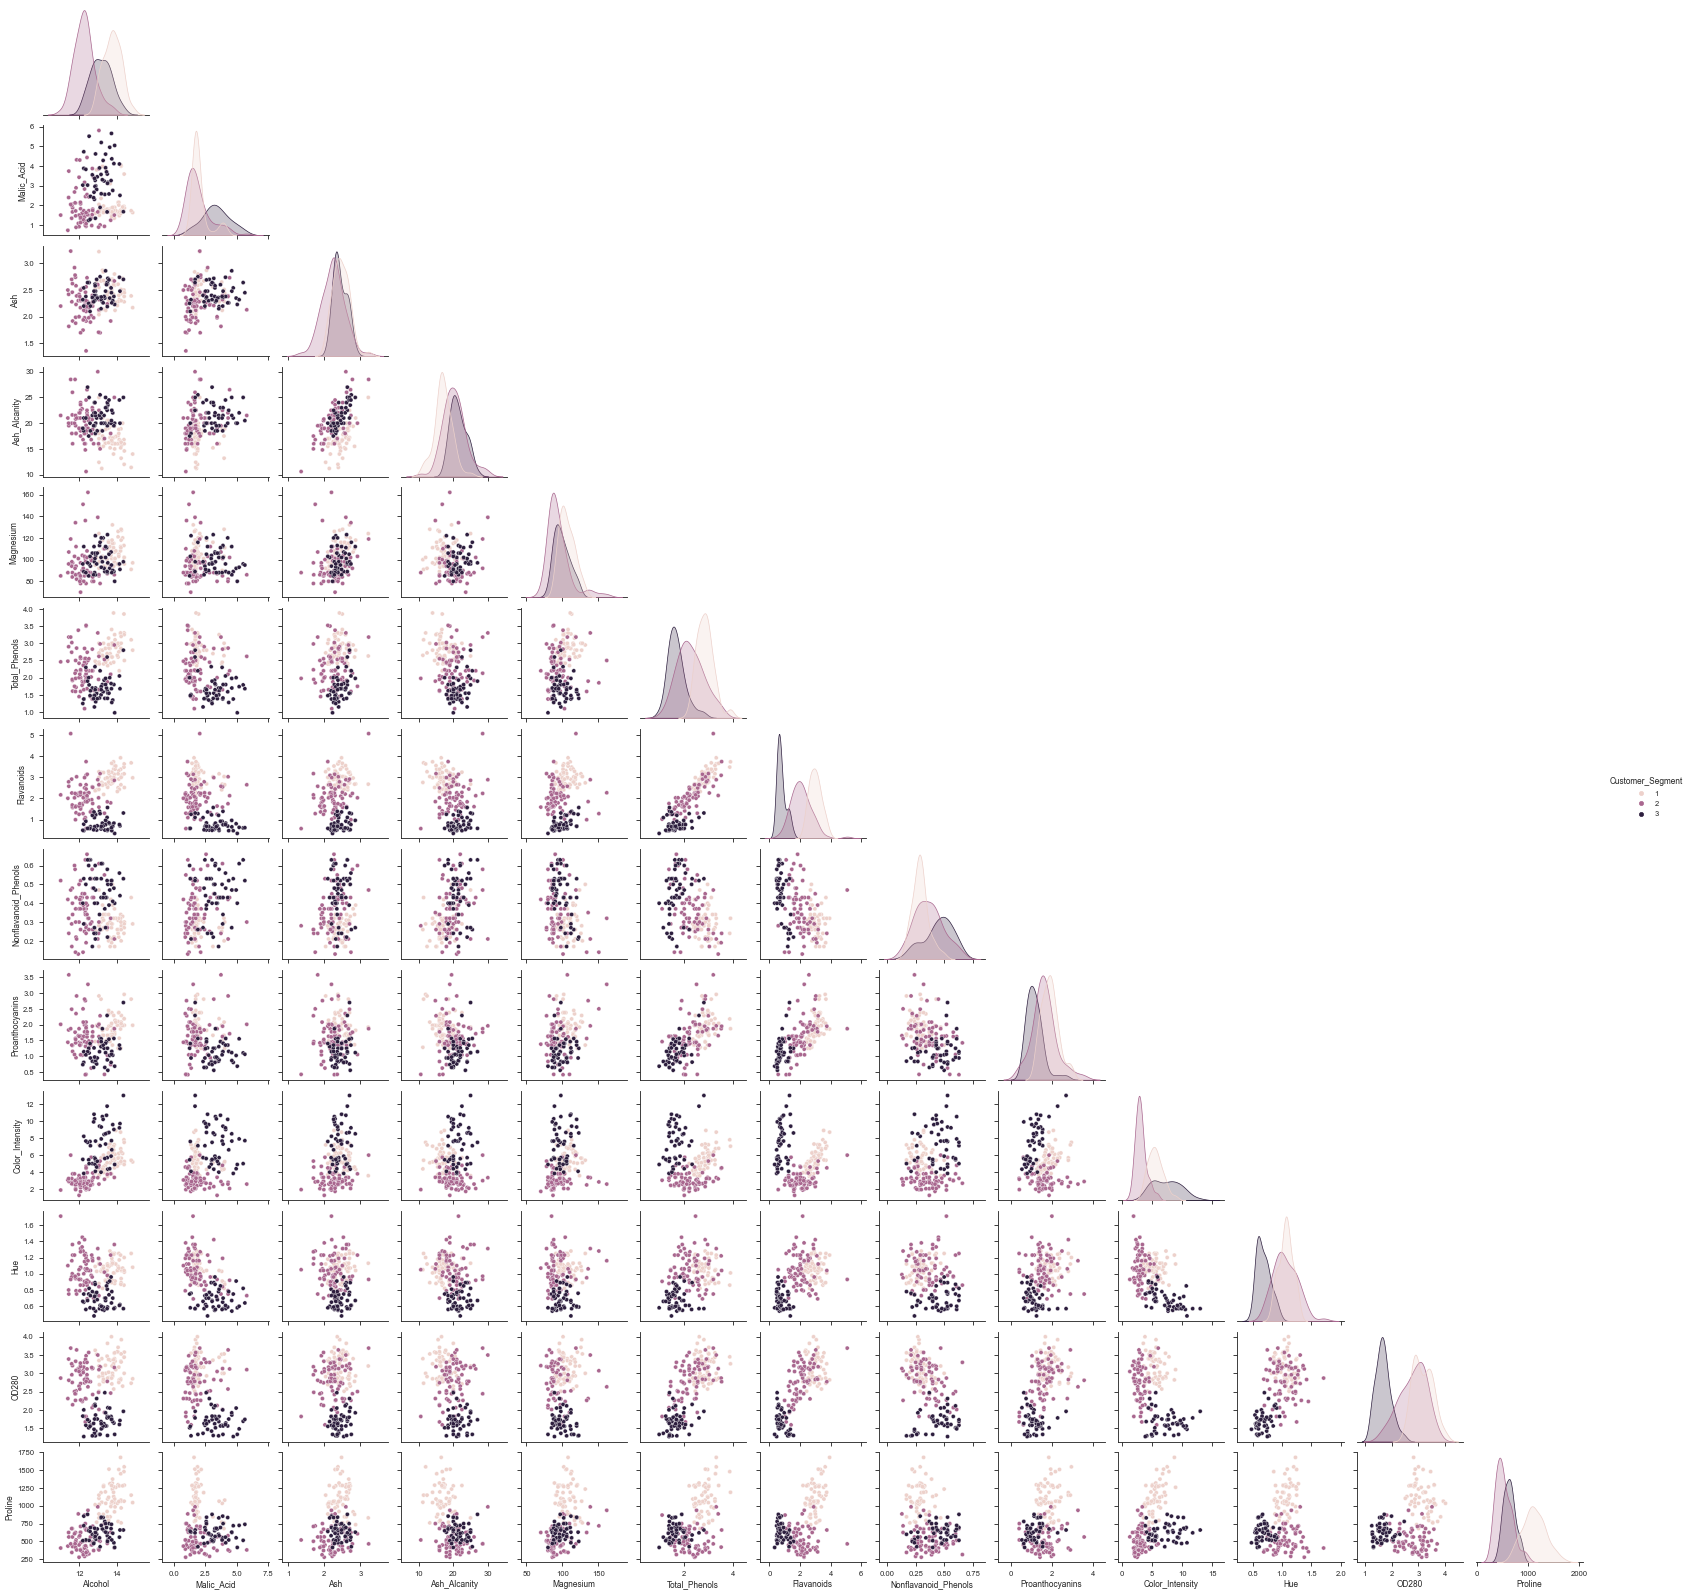

In [181]:
# Check the pair relationship under different customer segment
print('\nFigure 3:Pair Plot classify by customer segement')
sns.set(style="ticks",
        color_codes=True)
sns.pairplot(f_in,
             hue='Customer_Segment',
             corner=True)
plt.show()

We check the skewness of data in different variables. Combined with the histogram (Figure 4), we can find the data of alcohol, total phenols, flavonoids, hue are approximately normal distribution.


Figure 4:Histogram


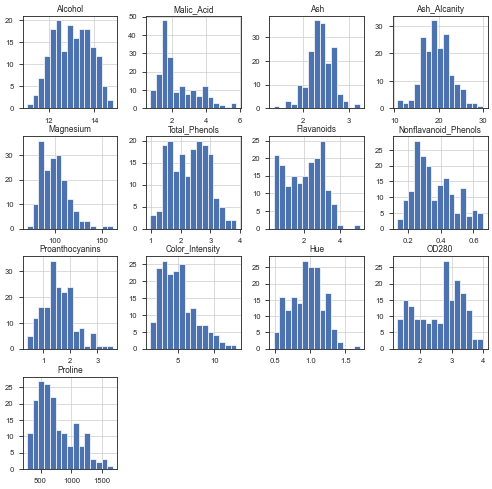

In [182]:
# Histogram
print('\nFigure 4:Histogram')
wine.hist(figsize=(12,12),
          bins=15,
          layout=(4,4))
plt.savefig('histogram.png')
plt.show()

In [125]:
# Skewness
print(wine.shape)
wine.skew()

(178, 13)


Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

In [126]:
# Kurtosis
wine.kurt()

Alcohol                -0.852500
Malic_Acid              0.299207
Ash                     1.143978
Ash_Alcanity            0.487942
Magnesium               2.104991
Total_Phenols          -0.835627
Flavanoids             -0.880382
Nonflavanoid_Phenols   -0.637191
Proanthocyanins         0.554649
Color_Intensity         0.381522
Hue                    -0.344096
OD280                  -1.086435
Proline                -0.248403
dtype: float64

In order to discovery anomalies precisely, we draw the boxplot (Figure 5) and find that there are outliers in malic acid, ash, alkalinity of ash, magnesium, proanthocyanins, color intensity and hue. Because of the outliers in the data, it would be better to do Scaler rather than MinMaxScaler.


Figure 5:Univariate BoxPlots


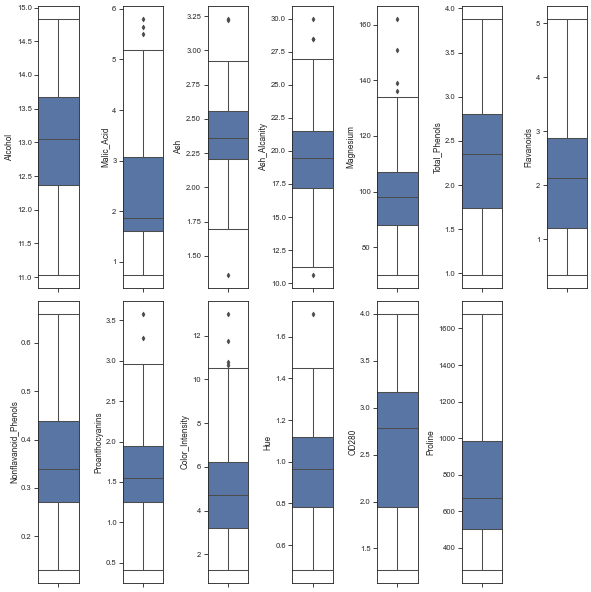

In [19]:
# BoxPlots
column = wine.columns.tolist()
fig = plt.figure(figsize=(12,12))
for i in range(13):
    plt.subplot(2,7,i+1)
    sns.boxplot(y=wine[column[i]] ,
                orient='v',
                width=2) 
    plt.ylabel(column[i], 
               fontsize=12)
    plt.tight_layout()
print('\nFigure 5:Univariate BoxPlots')

#  2.Machine Learning

To cluster the 178 wines into different types according to 13 chemical components, we basically apply four machine learning models, including K-Means clustering, hierarchy clustering, mixture model and PCA.

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import mglearn
import kneed as knee
from kneed import KneeLocator 
from sklearn.mixture import GaussianMixture
# from sklearn.externals import joblib
# from sklearn import cluster

## 2.1 Normalization

We standardize the multivariate data with StandardScaler() such that its distribution will have a mean value 0 and standard deviation of 1. Hence, we can remove the impact of scale on the following analysis.

In [21]:
# Standardization
scaler = StandardScaler()
wine_normal = pd.DataFrame(scaler.fit_transform(wine),
                           columns = wine.columns,
                           index = wine.index)
wine_normal

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## 2.2 Kmeans

Under K-Means clustering, we first use elbow method to plot the lowest SSE values under different numbers of clusters. The reason why we specify the range (1, 18) for “i” is that we considered trade-off between bias and variance. Also, since K is smaller than 10, we do multiple random initializations to avoid local optimum. After visualizing the values (Figure 6), we manually choose the “elbow” number of clusters, which is 3. This choice is also verified by using KneeLocator afterwards.


Figure 6:Elbow Method


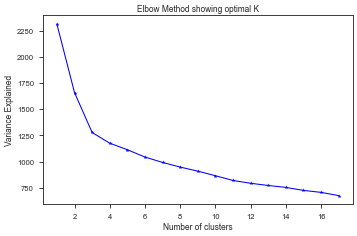

In [169]:
# Use the Elbow Method to show the optimal K value.

sse =[]
for i in range (1,18):
    km = KMeans(n_clusters = i)
    km.fit(wine_normal)
    sse.append(km.inertia_)

print('\nFigure 6:Elbow Method')
plt.figure(figsize = (8,5))
plt.plot(range(1,18),
         sse,
         marker = "*",
         color="blue")
plt.xlabel ('Number of clusters')
plt.ylabel('Variance Explained')
plt.title('Elbow Method showing optimal K')
plt.show()


The optimal k is: 3

Figure 7:Knee Point plot


<Figure size 400x250 with 0 Axes>

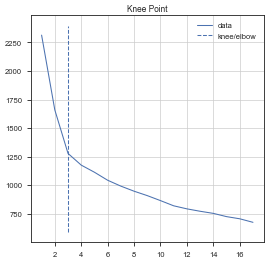

In [199]:
kl = KneeLocator(range(1, 18), 
                 sse, curve = "convex",
                 direction = "decreasing")

plt.figure(figsize =(8,5))
print('\nThe optimal k is:',kl.elbow)
kl.plot_knee()
plt.grid()
print('\nFigure 7:Knee Point plot')

we can observed from the Elbow Method that the optimal k is 3, so we try to cluster the scaled data into 3 clusters using KMeans.

In [177]:
y = f_in['Customer_Segment']

# test the accuracy of the model 
# Because the initial value for each run of Kmeans is random, the output is not fixed, and the results may differ from one to another. 
# since the predicted labels do not have quantitative meanning, so it may not be exactly the same as the true label.
# so we use crosstable to check the precision of our prediction.

km = KMeans(n_clusters=3)
km.fit(wine_normal)
y_kmeans = km.predict(wine_normal)
y_actu = pd.Series(y)
y_pred = pd.Series(y_kmeans)
ct = pd.crosstab(y_pred, y_actu)
acc_kmeans = (max(ct.loc[:,1]) + max(ct.loc[:,2]) + max(ct.loc[:,3])) / 178
print("Accuracy: ",acc_kmeans)
ct

Accuracy:  0.9662921348314607


Customer_Segment,1,2,3
row_0,,,
0,0,3,48
1,0,65,0
2,59,3,0



Figure 8:Pair Plot classify by Kmeans results


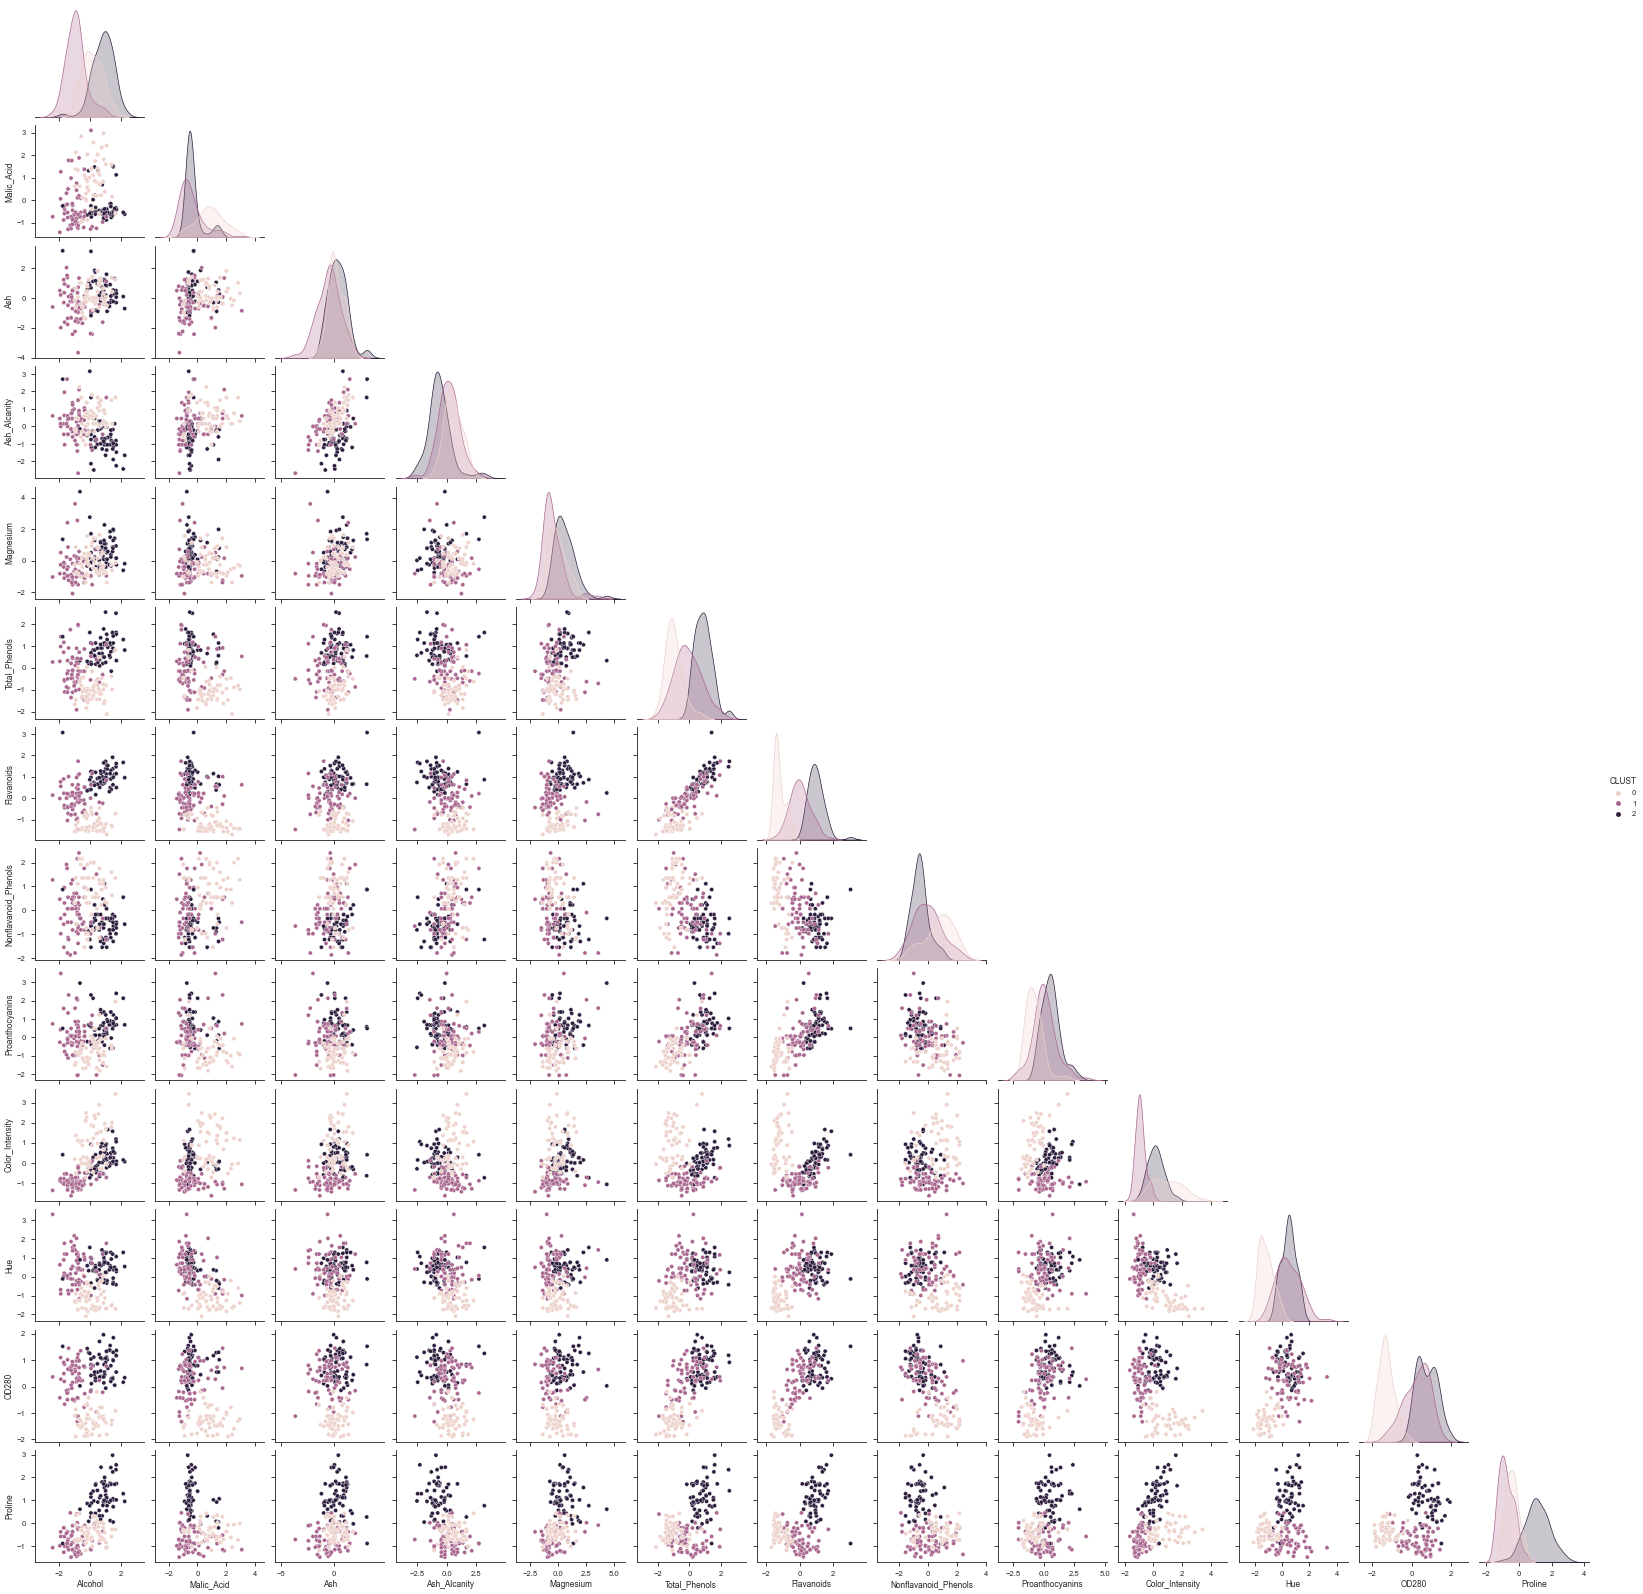

In [178]:
print('\nFigure 8:Pair Plot classify by Kmeans results')
wine_normal_copy = wine_normal.copy()
wine_normal_copy["CLUST"] = y_kmeans
sns.set(style="ticks", 
        color_codes=True)
sns.pairplot(wine_normal_copy, 
             hue="CLUST",
             corner=True)

## 2.3 Silhouette

We further apply silhouette to see silhouette score under different numbers of clusters. Referring to Figure 9, it seems that when K=3, the silhouette is most convincing among the four plots. This is further verified by Figure 10, which shows the highest score when the wines are clustered in 3 groups.


Figure 9:Silhouette plots


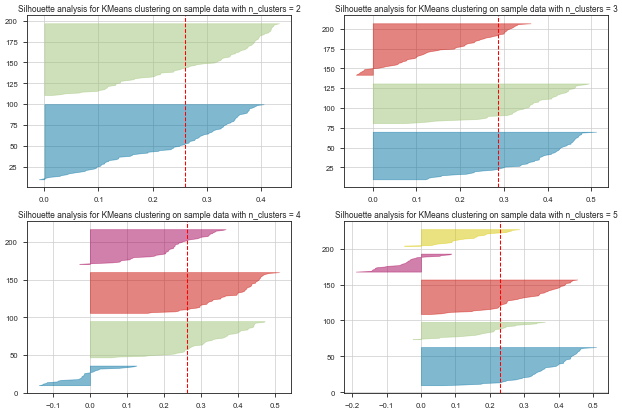

In [195]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

print('\nFigure 9:Silhouette plots')

for i in [2,3,4,5]:
    q, mod = divmod(i,2)
    ax[q-1][mod].grid()
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(wine_normal)
    ax[q-1][mod].set_title("Silhouette analysis for KMeans clustering on sample data ""with n_clusters = %d" % i)


Figure 10:Silhouette score


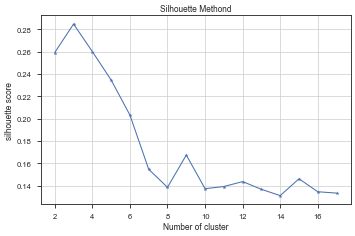

In [32]:
scores = []
for i in range (2,18):
    km = KMeans(n_clusters = i)
    km.fit(wine_normal)
    scores.append(metrics.silhouette_score(wine_normal,
                                           km.labels_,
                                           metric='euclidean'))

print('\nFigure 10:Silhouette score')
plt.figure(figsize = (8,5))
plt.plot(range(2,18),
         scores,
         marker = "*")
plt.grid()
plt.xlabel('Number of cluster')
plt.ylabel('silhouette score')
plt.title('Silhouette Methond')
plt.show()

## 2.4 Hierarchcal Clustering

From the dendrograms (Figure 11) below, we can observed 'ward' and 'complete' show better clustering performance compare with the remainings.


Figure 11:Hierarchcal Clustering plots


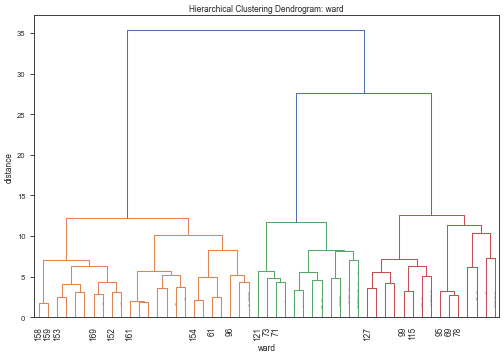

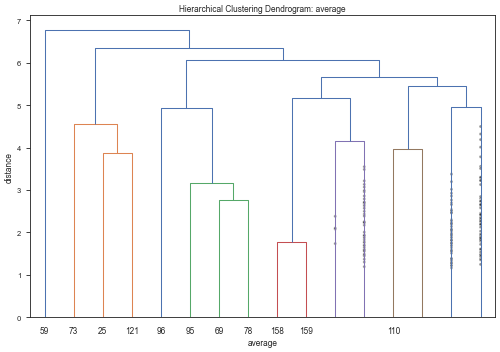

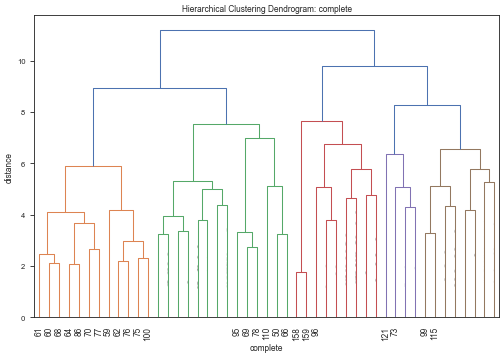

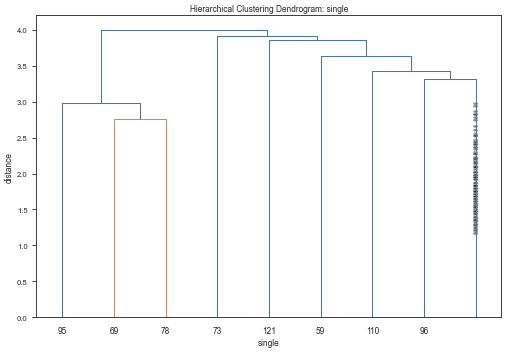

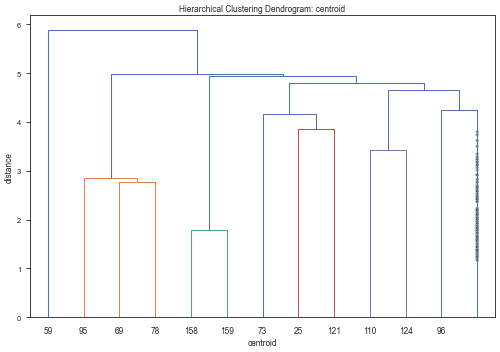

In [200]:
linkages = ['ward', 'average','complete','single','centroid']
print('\nFigure 11:Hierarchcal Clustering plots')
for i,link in enumerate(linkages):
    z = linkage(wine_normal,link)
    plt.figure(figsize=(12, 8))
    plt.title('Hierarchical Clustering Dendrogram'+": "+link)
    plt.xlabel(linkages[i])
    plt.ylabel('distance')
    dendrogram(z, 
               truncate_mode='level',
               p=5, 
               show_leaf_counts=False,
               leaf_font_size=12., 
               show_contracted=True)
    plt.show()

Following we use AgglomeraiveClustering to check the performance of the reduction dimensionality. For AgglomerativeClustering method, 'average' and 'single' methods show the best result.

In [129]:
methods =['ward','average','single','complete']
acc_score = []
for i,method in enumerate(methods):
    HClustering = AgglomerativeClustering(n_clusters = 3,
                                          affinity = "euclidean",
                                          linkage = method)
    HClustering.fit(wine_normal)
    y_actu = pd.Series(y)
    y_hierarchy = HClustering.labels_
    ct = pd.crosstab(y_hierarchy, y_actu)
    acc_score.append((max(ct.loc[:,1]) + max(ct.loc[:,2]) + max(ct.loc[:,3])) / 178)
    print('The labeling accuracy for',{method:acc_score[i]})

acc_ward = acc_score[0]
acc_average = acc_score[1]
acc_single = acc_score[2]
acc_complete = acc_score[3]

The labeling accuracy for {'ward': 0.9269662921348315}
The labeling accuracy for {'average': 0.9775280898876404}
The labeling accuracy for {'single': 0.9775280898876404}
The labeling accuracy for {'complete': 0.8370786516853933}


## 2.5 PCA

In [172]:
X_train, X_test, y_train, y_test = train_test_split(wine_normal,y, random_state=42, stratify=y)

In [173]:
pca = PCA(0.9)
pca.fit(wine_normal)
pca.n_components_

8

To obtain 90% of explained variances, we reduce dimentionality using PCA model and observed that at least 8-dimension should be kept.


Figure 12:Explained Variances


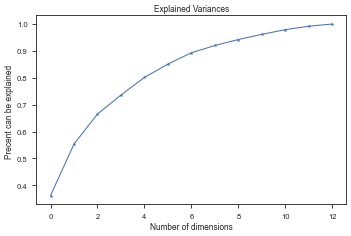

In [183]:
print('\nFigure 12:Explained Variances')
pca = PCA(n_components = 13)
pca.fit(wine_normal)
plt.figure(figsize=(8,5))
plt.plot([i for i in range(wine_normal.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(wine_normal.shape[1])],
         marker = "*")
plt.xlabel('Number of dimensions')
plt.ylabel('Precent can be explained ')
plt.title('Explained Variances')
plt.show()                                                                                   

In [175]:
pca = PCA(n_components=8)
wine_pca = pca.fit_transform(wine_normal)


Figure 13:Customer segments classify by PCA result
Explained variance is: [0.36198848 0.1920749 ]


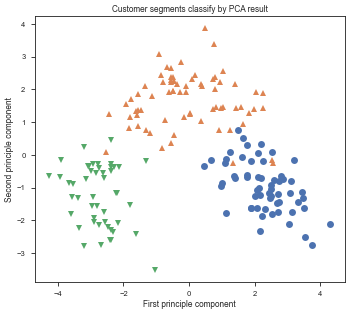

In [184]:
print('\nFigure 13:Customer segments classify by PCA result')

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(wine_pca[:,0],
                         wine_pca[:,1],
                         y)
plt.gca().set_aspect('equal')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('Customer segments classify by PCA result')

print('Explained variance is:', pca.explained_variance_ratio_[0:2])
plt.show()

After reducing the original data to 8 dimensions through the PCA model, we selected the first two dimensions with the highest explanation variance for mapping. We do a scatter plot for the first two dimensions. For the first principle component, it can explained 36% of scaled data. For the second component, it can explained 19% of data. In the plot there are three clusters with some overlapping. We can check the plot of clustering, data in the figure are roughly divided into three clusters, which are roughly consistent with the real data.

In [135]:
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
acc_pca_lr = lr.score(X_test_pca, y_test)
print('accuracy:',acc_pca_lr)

accuracy: 0.9777777777777777


In [137]:
pca =PCA(n_components = 13)
pca.fit(wine_normal)
print('Explained variance for each dimension is:', pca.explained_variance_ratio_)

Explained variance for each dimension is: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


## 2.6 Mixture Model

In [151]:
gmm = GaussianMixture(n_components=3).fit(wine_normal) 
labels = gmm.predict(wine_normal) +1              
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [152]:
y_actu = pd.Series(y)
y_pred_mix = pd.Series(labels, name = 'Predicted label')
ct = pd.crosstab(y_pred_mix, y_actu)

acc_mixture = (max(ct.loc[:,1]) + max(ct.loc[:,2]) + max(ct.loc[:,3])) / 178
print(acc_mixture)
ct

0.9662921348314607


Customer_Segment,1,2,3
Predicted label,,,
1,0,3,48
2,0,65,0
3,59,3,0


Same as the previous models, we use crosstab to show the labeling results and calculate the prediction accuracy, which equals to 96.63%.

The aic optimal is 2
The bic optimal is 3

Figure 14:BIC & AIC


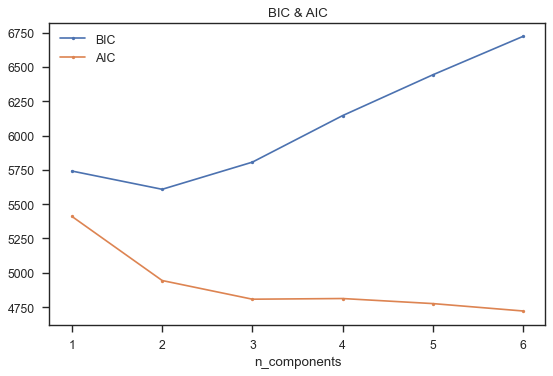

In [196]:
bic_list = []
aic_list = []
gmm_list = []
n_components = range(1,7)
for k in n_components:
    gmm = GaussianMixture(k,covariance_type='full', random_state=0)
    gmm_list.append(gmm.fit(wine_normal))
    bic_list.append(gmm.bic(wine_normal))
    aic_list.append(gmm.aic(wine_normal))

plt.figure(figsize=(8,5), dpi=80)
plt.plot(n_components,bic_list,
         label = "BIC",
         marker = ".")
plt.plot(n_components,
         aic_list,label = "AIC",
         marker = ".")
plt.legend(loc = "best")
plt.xlabel("n_components")
plt.title('BIC & AIC')

a = KneeLocator(range(1,7),[m.aic(wine_normal)for m in gmm_list],curve="convex", direction="decreasing")
b = KneeLocator(range(1,7),[m.bic(wine_normal)for m in gmm_list],curve="convex", direction="increasing")
print('The aic optimal is',a.elbow)
print('The bic optimal is',b.elbow)
print('\nFigure 14:BIC & AIC')

Check with the AIC and BIC plot (Figure 14). For AIC, the decreasing from 3 components to 4 components is realtively small, so that we better choose the model with less components. For BIC, we use KneeLocator to check the turning points which equals to 3. So that for both AIC and BIC results are consistent with the above assumption.

## 3.Comparision

In [120]:
acc_score = np.array([acc_kmeans,acc_ward,acc_single,acc_average,acc_complete,acc_pca_lr,acc_mixture])
score = pd.DataFrame(acc_score,index=['kmeans','ward','single','average','complete','pca_lr','mixture'],columns=['prediction score'])
score

,prediction score
kmeans,0.966292
ward,0.926966
single,0.977528
average,0.977528
complete,0.837079
pca_lr,0.977778
mixture,0.966292


In [122]:
score.sort_values(by = 'prediction score',ascending=False)

,prediction score
pca_lr,0.977778
single,0.977528
average,0.977528
kmeans,0.966292
mixture,0.966292
ward,0.926966
complete,0.837079



Figure 15:Performance Score


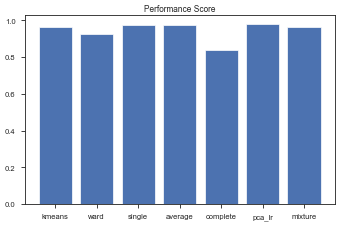

In [198]:
plt.figure(figsize=(8,5))
plt.bar(score.index,score['prediction score'])
plt.title('Performance Score')
print('\nFigure 15:Performance Score')

Conclusion: Comparing all the clustering models and sorting the performance score in descending order, we can observe that pca, HAC_single, and HAC_average methods have respectively high performance score. KMeans and Mixture models are also doing well with scores of around 96.6%.